# Tri-box clustering of Job Offerings data

In [41]:
# get the data from file
import pandas as pd
import re
data = pd.read_csv('data_for_clustering.csv',encoding='utf8',index_col=None)
data= data.drop('Unnamed: 0',axis=1)
data.head(5)

,domain_id,domain_name,profearea_id,profearea_name,ad_id,name,requirements,responsibilities,conditions,req_refined,req_idxs,resp_refined,resp_idxs,cond_refined,cond_idxs
0,7,"Информационные технологии, интернет, телеком",107,Руководитель проектов,89187718,Руководитель проектов сопровождения,Умеете работать с рисками; \n Способны выстраи...,Развивать бизнес-приложения и решения внешних ...,Официальное оформление с первого рабочего дня;...,[],"(array([], dtype=int64),)",['проектной документации' 'разработка проектно...,"(array([ 6, 31], dtype=int64),)",['начало рабочего дня' 'профессионального разв...,"(array([ 4, 5, 14, 18, 22, 41], dtype=int64),)"
1,7,"Информационные технологии, интернет, телеком",10,Аналитик,90478414,Системный аналитик,Опыт работы аналитиком от 2-х лет; \nОпыт прое...,Возможность построить карьеру в ИТ банковской ...,Опыт работы с CRM-системами (Microsoft Dynamic...,['описания бизнес процессов' 'уверенный пользо...,"(array([11, 12, 16, 43], dtype=int64),)",['тестирование' 'участие в планировании' 'учас...,"(array([ 2, 4, 32, 34, 47], dtype=int64),)",[],"(array([], dtype=int64),)"
2,7,"Информационные технологии, интернет, телеком",10,Аналитик,87797674,Ведущий аналитик,Управление работой группы аналитиков на проект...,Опыт проектирования систем различного класса в...,Никаких Дресс-кодов и стандартов \nКлассные ве...,['описания бизнес процессов' 'опыт работы сист...,"(array([11, 16, 48], dtype=int64),)",['взаимодействие с заказчиком' 'тестирование' ...,"(array([ 1, 2, 7, 47], dtype=int64),)",['дмс со стоматологией' 'корпоративные скидки'...,"(array([ 0, 7, 15, 16, 17, 22, 25, 27, 39, 46..."
3,7,"Информационные технологии, интернет, телеком",96,"Программист, разработчик",90037853,Программист Баз Данных (SQL),Уверенные знания SQL (MySQL) понимание плана в...,"Оптимизация SQL-кода (план запроса, управление...",Занятия в фитнес-клубе за счет компании; \nОпл...,['sql' 'тестирование' 'git'],"(array([ 0, 43, 47], dtype=int64),)",['взаимодействие с заказчиком' 'анализ бизнес ...,"(array([ 1, 3, 7, 14, 43], dtype=int64),)",['начало рабочего дня' 'гибридный формат' 'обу...,"(array([ 4, 6, 16, 17], dtype=int64),)"
4,7,"Информационные технологии, интернет, телеком",96,"Программист, разработчик",88043841,Разработчик в команду надёжности и производите...,знаете С++ и многопоточное программирование; \...,"придумывать, разрабатывать и улучшать инструме...",знаете ROS; \nпрограммировали и анализировали ...,['работать в команде' 'принимать решения нести...,"(array([ 5, 41, 43, 48, 49], dtype=int64),)",['тестирование' 'сбор анализ' 'разработка подд...,"(array([ 2, 10, 42], dtype=int64),)",[],"(array([], dtype=int64),)"


# 1.Считаем файлы выделенных фраз

In [42]:
# read lists of requirements,responsibiliries, conditions from files
f = open('resp_picked.txt', mode='r', encoding='UTF-8')
resp_picked = f.readlines()
f.close()
f = open('req_picked.txt', mode='r', encoding='UTF-8')
req_picked = f.readlines()
f.close()
f = open('cond_picked.txt', mode='r', encoding='UTF-8')
cond_picked = f.readlines()
f.close()

In [43]:
# n - length of requirements list
n = len(req_picked)
# m - length of responsibilities list
m = len(resp_picked)
# l - length of conditions list
l = len(cond_picked)

# 2.Посчитаем веса вакансий

In [44]:
weights = data[['ad_id','resp_idxs','req_idxs','cond_idxs']].drop_duplicates()
weights['resp_idxs'] = weights['resp_idxs'].str.replace('dtype=int64', '')
weights['req_idxs'] = weights['req_idxs'].str.replace('dtype=int64', '')
weights['cond_idxs'] = weights['cond_idxs'].str.replace('dtype=int64', '')


# weight of vacancy is an average sum of number of extracted requirements, responsibilities, conditions
w =[]
for el in weights.values:
    temp = round((len(re.findall("\d+", el[1]))+len(re.findall("\d+", el[2]))+len(re.findall("\d+", el[3])))/3.0)
    w.append(temp)

In [45]:
data_no_duplicates = data[['ad_id','req_idxs','resp_idxs','cond_idxs']].drop_duplicates()
data_no_duplicates['resp_idxs'] = data_no_duplicates['resp_idxs'].str.replace('dtype=int64', '')
data_no_duplicates['req_idxs'] = data_no_duplicates['req_idxs'].str.replace('dtype=int64', '')
data_no_duplicates['cond_idxs'] = data_no_duplicates['cond_idxs'].str.replace('dtype=int64', '')

# 3.Построим 3х входовую матрицу

In [46]:
# get the lists of indexes of requirements, rsponsibilities and conditions of dataframe
reqs = []
resps = []
conds = []
for el in data_no_duplicates.values:
    req = re.findall("\d+", el[1])
    resp = re.findall("\d+", el[2])
    cond = re.findall("\d+", el[3])
    reqs.append(req)
    resps.append(resp)
    conds.append(cond)

In [47]:
# build a 3d matrix
import numpy as np
res= np.zeros((n,m,l), dtype=float)
for i in range(len(w)):
    temp= np.zeros((n,m,l), dtype=float)
    for el in reqs[i]:
        for el2 in resps[i]:
            for el3 in conds[i]:
                
                # if combination (el,el2,el3) is in vacancy's (requirements, responsibilities, conditions), 
                # then add 1 to the (el,el2,el3)-th element of 3d matrix
                temp[int(el)][int(el2)][int(el3)]+=1.0
    # after we iterated over all requirements, responsibilities, conditions sets of a vacancy, 
    # add this 3d adjacency matrix to the r-matrix, but divide by the weight of the vacancy
    # Divide - because the larger the weight is, the more requirements, responsibilities and conditions 
    # were exctracted
    # for the vacancy - thus it's less important and more general
    if w[i] != 0:
        res+=temp*1.0/w[i]

res = [[[np.round(el*1.0,2) for el in el2] for el2 in el3] for el3 in res]

In [48]:
res = np.array(res)


In [49]:
# sum of all positive elements in matrix
sum_res = 0
for el in res:
    for el2 in el:
        for el3 in el2:
            if el3>0:
                sum_res+=el3

In [50]:
sum_res

106724.84999999103

In [51]:
## apply modularity transformation

a_ipp = np.zeros(n,dtype=float)
a_jpp = np.zeros(m,dtype=float)
a_kpp = np.zeros(l,dtype=float)
for ii in range(n):
    a_ipp[ii]=sum(sum(res[ii][:][:]))
for jj in range(m):
    a_jpp[jj]=sum(sum(res[:][jj][:]))
for kk in range(l):
    a_kpp[kk]=sum(sum(res[:][:][kk]))
    
a_ijk = np.zeros((n,m,l),dtype=float)
for ii in range(n):
    for jj in range(m):
        for kk in range(l):
            a_ijk[ii][jj][kk] = round(a_ipp[ii]*a_jpp[jj]*a_kpp[kk]*1.0/ sum_res**2,2)

In [52]:
print(len(res[res>0]))
print(len(res[res<0]))

56875
0


In [53]:
#union of two sets
def union(lst1,lst2):
    return list(set(lst1).union(set(lst2)))

Определим функции из метода Миркина, Крамаренко

In [54]:
# sum elements of 3d matrix on V,W,U places, where V,W,U - arrays of indexes of requirements, responsibilities, conditions
def sum_VWU(V,W,U,res):
    r = 0
    for el in V:
        for el2 in W:
                for el3 in U:
                    r+=res[el][el2][el3]
    return r

# sum elements of 3d matrix on i,W,U places, where W,U - arrays of indexes of responsibilities, 
# conditions, i - i_th requirement
def sum_iWU(i,W,U,res):
    r = 0
    for el in W:
        for el2 in U:
            r+=res[i][el][el2]
    return r

# sum elements of 3d matrix on i,W,U places, where V,U - arrays of indexes of requirements, 
# conditions, j - j_th responsibility

def sum_jVU(V,j,U,res):
    r = 0
    for el in V:
        for el2 in U:
            r+=res[el][j][el2]
    return r

# sum elements of 3d matrix on V,W places, where V,W - arrays of indexes of requirements, 
# responsibilities, k - k_th condition

def sum_kVW(V,W,k,res):
    r = 0
    for el in V:
        for el2 in W:
            r+=res[el][el2][k]
    return r

# Эксперимент 1. Адаптированная версия метода Tribox

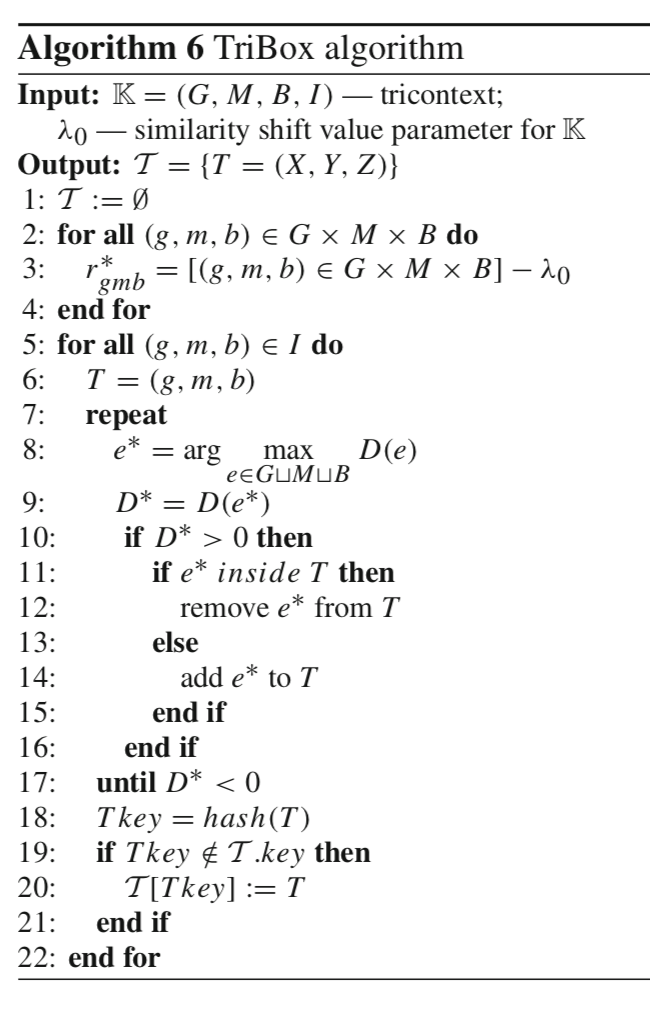

Процедура D(i) из метода Миркина, Крамаренко

In [61]:
def del_(r,V,W,U,row,col,xray):
    # length of requirements array
    n = len(r)
    # length of responsibilities array
    m = len(r[0])
    # length of rconditions array
    l = len(r[0][0])
    # nv,nw,nu - lengths of current tri-box cluster
    nv=len(V)
    nw=len(W)
    nu= len(U)
    rVWU = sum_VWU(V,W,U,r)
        
    if nw*nv*nu == 0:
        print('All sets in a box must be non-empty!')
        return val,z
    
    if len(col)*len(row)*len(xray) != 0:
        print('Either row or col or xray must be 0 at changing the box')
        return val,z
    
    if len(col) + len(row) + len(xray) == 0:
        print('Either row or col or xray must be not 0 at changing the box')
        return val,z
    
    # if row=requirement is to be added
    if len(row) > 0:
        row = row[0]
        # sr sum of elements for the row
        sr= sum_iWU(row,W,U,r)
        it= 2*sr*rVWU
        #if row is in set already, we need to delete it, so z=-1
        if row in V:
            z=- 1
        else:
            z=1
        # val - the difference at cluster data-scatter upon adding or removing row to the box
        if sr<0.0: 
            val = -1
        else:
            val=z*it + sr ** 2 - z*rVWU**2 / nv
            if nv + z == 0:
                val=- 1
            else:
                val=val / (nw*nu*(nv + z))
    else:
        # if xray=condition is to be added
        if len(xray) > 0:
            xray = xray[0]
            # sx sum of elements for the xray
            sx=sum_kVW(V,W,xray,r)
            it=2*sx*rVWU
            #if xray is in set already, we need to delete it, so z=-1
            if xray in U:
                z=- 1
            else:
                z=1
            if sx<0.0:
                val=-1
            else:# val - the difference at cluster data-scatter upon adding or removing xray to the box
                val=z*it + sx ** 2 - z*rVWU**2 / nu
                if nu + z == 0:
                    val=- 1
                else:
                    val=val / (nv*nw*(nu + z))
        else:
            # if col=responsibility is to be added
            if len(col) > 0:
                col = col[0]
                # sc sum of elements for the column
                sc=sum_jVU(V,col,U,r)
                it=2*sc*rVWU
                if col in W:
                    z=- 1
                else:
                    z=1
                if sc<0.0:
                    val = -1
                else:# val - the difference at cluster data-scatter upon adding or removing col to the box
                    val=z*it + sc ** 2 - z*rVWU**2 / nw
                    if nw + z == 0:
                        val=- 1
                    else:
                        val=val / (nv*nu*(nw + z))
            else:
                print('No col or row or xray supplied!!!')
                return val,z
    return val,z

Процедура из метода Крамаренко и Миркина, возвращает элемент с максимальным D(i)

In [62]:
def nbox(r, V, W, U):
    n = len(r)
    m = len(r[0])
    l = len(r[0][0])
    
    row = []
    cnr = -1000
    for ii in range(n):
        v, z = del_(r, V, W, U, [ii], [], [])
        if v > cnr:
            cnr = v
            zr = z
            row = ii
    
    col = []
    cnc = -1000
    for jj in range(m):
        v, z = del_(r, V, W, U, [], [jj], [])
        if v > cnc:
            cnc = v
            zc = z
            col = jj
    
    xray = []
    cnx = -1000
    for kk in range(l):
        v, z = del_(r, V, W, U, [], [], [kk])
        if v > cnx:
            cnx = v
            zx = z
            xray = kk
    
    if cnr == max([cnc, cnr, cnx]):
        if cnr > 0:
            if zr > 0:
                Vn = list(set(V).union([row]))
            else:
                Vn = list(set(V) - set([row]))
            Wn = W
            Un = U
            dcn = cnr
        else:
            Vn = V
            Wn = W
            Un = U
            dcn = 0
    elif cnc == max([cnc, cnr, cnx]):
        if cnc > 0:
            if zc > 0:
                Wn = list(set(W).union([col]))
            else:
                Wn = list(set(W) - set([col]))
            Vn = V
            Un = U
            dcn = cnc
        else:
            Vn = V
            Wn = W
            Un = U
            dcn = 0
    else:
        if cnx == max([cnc, cnr, cnx]):
            if cnx > 0:
                if zx > 0:
                    Un = list(set(U).union([xray]))
                else:
                    Un = list(set(U) - set([xray]))
                Wn = W
                Vn = V
                dcn = cnx
            else:
                Vn = V
                Wn = W
                Un = U
                dcn = 0
    
    return Vn, Wn, Un, dcn

Процедура, формирующая трикластер: Добавляем/удаляем элементы из трикластера с максимальным D(i), пока D(i) не станет меньше нуля

In [63]:
def brc(r,row,col,xray):
    counf=0
    n = len(r)
    m = len(r[0])
    l = len(r[0][0])
    r = np.array(r)
    ff=0
    
    if len(row) > 0:
        V=row
        row = int(row[0])
        try:
            temp = np.where(r[row][:][:]>0.0)
            W = [temp[0][0]]
            try:
                U= [temp[1][0]]
            except:
                ff=1
                return V,W,[],0,0,0
        except:
            ff=1
            return V,[],[],0,0,0
        
    if ff==0:
        # la = the average of tricluster
        la=sum_VWU(V,W,U,r) / (len(V)*len(W)*len(U))
        co=(la ** 2)*(len(V)*len(W)*len(U))
        dd=1
        while (dd > 0):
            V,W,U,dd=nbox(r,V,W,U)
            co=co + dd
            counf=counf + 1
            if counf%20==0:
                print('dd')
                print(dd)
                print('counf')
                print(counf)
                print('sum_VWU')
                print(sum_VWU(V,W,U,r))
                print('V')
                print(V)
                print('W')
                print(W)
                print('U')
                print(U)
            if counf>=1000:
                print('no hope')
                break
    contribution_to_sum = sum_VWU(V,W,U,r)*1.0/sum_res
    return V,W,U,la,co,contribution_to_sum

In [64]:
V=[]
W=[]
U = []
clusters_V=[]
clusters_W=[]
clusters_U=[]
la=0
co=0
temp_cond_picked = cond_picked
temp_req_picked = req_picked
temp_resp_picked = resp_picked
temp_res = res.copy()
bi_clusters_df = pd.DataFrame(columns = ['Requirements','Responsibilities',
                              'Conditions'])
i = 0
c_gen=0
while len(temp_cond_picked)*len(temp_req_picked)!=0:
    V=[]
    W=[]
    U = []
    print(len(temp_res))
    print(len(temp_res[0]))
    print(len(temp_res[0][0]))
    V,W,U,la,co,cont_percent = brc(temp_res,[0],[],[])
    if len(W)==0 or len(U) == 0:
        temp_res = np.delete(temp_res,0, axis=0)
        temp_req_picked = np.delete(temp_req_picked, 0)   
        print('empty cluster')
        print('contribution')
        print(cont_percent)
        c_gen+=cont_percent

    else:
        print('Contribution of cluster '+ str(round(cont_percent,4)))
        clusters_V.append(V)
        clusters_W.append(W)
        clusters_U.append(U)
        bi_clusters_df = bi_clusters_df._append({'Requirements':[temp_req_picked[el].replace('\n','') for el in clusters_V[i]],
                                                'Responsibilities':[temp_resp_picked[el].replace('\n','') for el in clusters_W[i]],
                                               'Conditions':[temp_cond_picked[el].replace('\n','') for el in clusters_U[i]]}, ignore_index = True)
        temp_res = np.delete(np.delete(np.delete(temp_res, U,axis =2), W,axis =1),V, axis=0)
        temp_req_picked = np.delete(temp_req_picked, V)
        temp_resp_picked = np.delete(temp_resp_picked, W)
        temp_cond_picked = np.delete(temp_cond_picked, U)
        c_gen+=cont_percent
        i+=1

53
48
48
dd
15068.72245305556
counf
20
sum_VWU
11126.0
V
[0, 2, 3, 4, 43]
W
[0, 1, 2, 6, 8, 42, 43, 13, 47, 31]
U
[0, 16, 18, 5, 7, 25, 27, 14]
Contribution of cluster 0.1965
47
30
38
empty cluster
contribution
0
46
30
38
dd
50.95843385714274
counf
20
sum_VWU
672.4200000000004
V
[0, 3, 23, 36, 38, 7, 9, 43]
W
[0, 1, 4, 23, 25]
U
[1, 2, 7, 8, 10, 13, 21, 24, 29, 31]
dd
21.449035003364198
counf
40
sum_VWU
2467.2699999999945
V
[0, 1, 3, 6, 7, 9, 10, 14, 16, 18, 23, 36, 37, 38, 39, 42, 43]
W
[0, 1, 4, 5, 13, 19, 20, 23, 25]
U
[1, 2, 3, 4, 7, 8, 10, 13, 16, 17, 21, 24, 25, 27, 29, 31, 36]
Contribution of cluster 0.036
23
17
18
Contribution of cluster 0.0
22
15
15
Contribution of cluster 0.0
21
14
12
Contribution of cluster 0.0
19
13
11
empty cluster
contribution
0
18
13
11
empty cluster
contribution
0
17
13
11
Contribution of cluster 0.0
12
12
10
empty cluster
contribution
0
11
12
10
empty cluster
contribution
0
10
12
10
empty cluster
contribution
0
9
12
10
empty cluster
contribution
0
8
12

In [65]:
bi_clusters_df

,Requirements,Responsibilities,Conditions
0,"[sql, знание языка программирования, высшее те...","[разработка программного обеспечения, взаимоде...","[дмс со стоматологией, профессионального разви..."
1,"[работать в команде, аналитический склад ума, ...","[платформе 1с, информационной безопасности, сб...","[карьерный рост, удаленный формат, начало рабо..."
2,[опыт работы с брокерами],"[code review, алгоритм]","[достойную зарплату, страховку от несчастных, ..."
3,[опыт работы с базами данных],[рефакторинг],"[офис в центре, ипотека, отсрочка]"
4,"[грамотная устная письменная речь, общаться с ...",[диагностика проведение ремонта профилактики],[точек роста карьерном развитии]
5,[оперативность быстрота выполнения задач ответ...,[дизайнер],[молодой]
6,[опыт работы в банковской],[pos терминалов восстановление их работоспособ...,[чай кофе]
7,[git],[развертывание],[парковку на территории]


In [226]:
bi_clusters_df.to_csv('tri-clusters_v1.csv')

# Эксперимент 2. Модифицированная версия метода Tribox

Процедура из метода Крамаренко и Миркина, возвращает элемент с максимальным D(i)

In [72]:
def sum_VWU_beta(V, W, U, res):
    VWU = 0
    for el in V:
        for el2 in W:
            for el3 in U:
                VWU += res[el][el2][el3]
    WU = 0
    for el in range(res.shape[0]):
        for el2 in W:
            for el3 in U:
                WU += res[el][el2][el3]

    VU = 0
    for el in V:
        for el2 in range(res.shape[1]):
            for el3 in U:
                VU += res[el][el2][el3]
    VW = 0
    for el in V:
        for el2 in W:
            for el3 in range(res.shape[2]):
                VW += res[el][el2][el3]

    beta = (
                   (VWU / VW if VW > 0 else 0) +
                   (VWU / VU if VU > 0 else 0) +
                   (VWU / WU if WU > 0 else 0)
           ) / 3

    return beta


def sum_VWU_alpha(V, W, U, res):
    WU = 0
    for el in range(res.shape[0]):
        for el2 in W:
            for el3 in U:
                WU += res[el][el2][el3]
    VU = 0
    for el in V:
        for el2 in range(res.shape[1]):
            for el3 in U:
                VU += res[el][el2][el3]
    VW = 0
    for el in V:
        for el2 in W:
            for el3 in range(res.shape[2]):
                VW += res[el][el2][el3]
    v = 0
    for el in V:
        for el2 in range(res.shape[1]):
            for el3 in range(res.shape[2]):
                v += res[el][el2][el3]
    w = 0
    for el in range(res.shape[0]):
        for el2 in W:
            for el3 in range(res.shape[2]):
                w += res[el][el2][el3]
    u = 0
    for el in range(res.shape[0]):
        for el2 in range(res.shape[1]):
            for el3 in U:
                u += res[el][el2][el3]

    alpha = (
                    (VW / v if v > 0 else 0) +
                    (VW / w if w > 0 else 0) +
                    (VU / v if v > 0 else 0) +
                    (VU / u if u > 0 else 0) +
                    (WU / w if w > 0 else 0) +
                    (WU / u if u > 0 else 0)
            ) / 6

    return alpha


In [73]:
def del_(r, V, W, U, row, col, xray):
    # length of requirements array
    n = len(r)
    # length of responsibilities array
    m = len(r[0])
    # length of rconditions array
    l = len(r[0][0])
    # nv,nw,nu - lengths of current tri-box cluster
    nv = len(V)
    nw = len(W)
    nu = len(U)
    rVWU = sum_VWU(V, W, U, r)

    if nw * nv * nu == 0:
        print('All sets in a box must be non-empty!')
        return val, z

    if len(col) * len(row) * len(xray) != 0:
        print('Either row or col or xray must be 0 at changing the box')
        return val, z

    if len(col) + len(row) + len(xray) == 0:
        print('Either row or col or xray must be not 0 at changing the box')
        return val, z

    # if row=requirement is to be added
    if len(row) > 0:
        rowS = row[0]
        # sr sum of elements for the row
        sr = (sum_VWU_beta(row, W, U, r) + sum_VWU_alpha(row, W, U, r)) / 2
        it = 2 * sr * rVWU
        # if row is in set already, we need to delete it, so z=-1
        if rowS in V:
            z = - 1
        else:
            z = 1
        # val - the difference at cluster data-scatter upon adding or removing row to the box
        if sr < 0.0:
            val = -1
        else:
            val = z * it + sr ** 2 - z * rVWU ** 2 / nv
            if nv + z == 0:
                val = - 1
            else:
                val = val / (nw * nu * (nv + z))
    else:
        # if xray=condition is to be added
        if len(xray) > 0:
            xrayS = xray[0]
            # sx sum of elements for the xray
            sx = (sum_VWU_beta(V, W, xray, r) + sum_VWU_alpha(V, W, xray, r)) / 2
            it = 2 * sx * rVWU
            # if xray is in set already, we need to delete it, so z=-1
            if xrayS in U:
                z = - 1
            else:
                z = 1
            if sx < 0.0:
                val = -1
            else:  # val - the difference at cluster data-scatter upon adding or removing xray to the box
                val = z * it + sx ** 2 - z * rVWU ** 2 / nu
                if nu + z == 0:
                    val = - 1
                else:
                    val = val / (nv * nw * (nu + z))
        else:
            # if col=responsibility is to be added
            if len(col) > 0:
                colS = col[0]
                # sc sum of elements for the column
                sc = (sum_VWU_beta(V, col, U, r) + sum_VWU_alpha(V, col, U, r)) / 2
                it = 2 * sc * rVWU
                if colS in W:
                    z = - 1
                else:
                    z = 1
                if sc < 0.0:
                    val = -1
                else:  # val - the difference at cluster data-scatter upon adding or removing col to the box
                    val = z * it + sc ** 2 - z * rVWU ** 2 / nw
                    if nw + z == 0:
                        val = - 1
                    else:
                        val = val / (nv * nu * (nw + z))
            else:
                print('No col or row or xray supplied!!!')
                return val, z
    return val, z


In [74]:
def nbox(r, V, W, U):
    n = len(r)
    m = len(r[0])
    l = len(r[0][0])
    
    row = []
    cnr = -1000
    for ii in range(n):
        v, z = del_(r, V, W, U, [ii], [], [])
        if v > cnr:
            cnr = v
            zr = z
            row = ii
    
    col = []
    cnc = -1000
    for jj in range(m):
        v, z = del_(r, V, W, U, [], [jj], [])
        if v > cnc:
            cnc = v
            zc = z
            col = jj
    
    xray = []
    cnx = -1000
    for kk in range(l):
        v, z = del_(r, V, W, U, [], [], [kk])
        if v > cnx:
            cnx = v
            zx = z
            xray = kk
    
    if cnr == max([cnc, cnr, cnx]):
        if cnr > 0:
            if zr > 0:
                Vn = list(set(V).union([row]))
            else:
                Vn = list(set(V) - set([row]))
            Wn = W
            Un = U
            dcn = cnr
        else:
            Vn = V
            Wn = W
            Un = U
            dcn = 0
    elif cnc == max([cnc, cnr, cnx]):
        if cnc > 0:
            if zc > 0:
                Wn = list(set(W).union([col]))
            else:
                Wn = list(set(W) - set([col]))
            Vn = V
            Un = U
            dcn = cnc
        else:
            Vn = V
            Wn = W
            Un = U
            dcn = 0
    else:
        if cnx == max([cnc, cnr, cnx]):
            if cnx > 0:
                if zx > 0:
                    Un = list(set(U).union([xray]))
                else:
                    Un = list(set(U) - set([xray]))
                Wn = W
                Vn = V
                dcn = cnx
            else:
                Vn = V
                Wn = W
                Un = U
                dcn = 0
    
    return Vn, Wn, Un, dcn


In [75]:
np.where(res[0][0][:]>0.0)

(array([ 0,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 30, 31, 32, 34, 35, 37,
        38, 39, 40, 41, 42, 43, 44, 46, 47], dtype=int64),)

In [76]:
def brc(r,row,col,xray):
    counf=0
    n = len(r)
    m = len(r[0])
    l = len(r[0][0])
    r = np.array(r)
    ff=0
    
    if len(row) > 0:
        V=row
        row = int(row[0])
        try:
            temp = np.where(r[row][:][:]>0.0)
            W = [temp[0][0]]
            try:
                U= [temp[1][0]]
            except:
                ff=1
                return V,W,[],0,0,0
        except:
            ff=1
            return V,[],[],0,0,0
        
    if ff==0:
        # la = the average of tricluster
        la=sum_VWU(V,W,U,r) / (len(V)*len(W)*len(U))
        co=(la ** 2)*(len(V)*len(W)*len(U))
        dd=1
        while (dd > 0):
            V,W,U,dd=nbox(r,V,W,U)
            co=co + dd
            counf=counf + 1
            if counf%20==0:
                print('dd')
                print(dd)
                print('counf')
                print(counf)
                print('sum_VWU')
                print(sum_VWU(V,W,U,r))
                print('V')
                print(V)
                print('W')
                print(W)
                print('U')
                print(U)
            if counf>=1000:
                print('no hope')
                break
    contribution_to_sum = sum_VWU(V,W,U,r)*1.0/sum_res
    return V,W,U,la,co,contribution_to_sum

In [77]:
V=[]
W=[]
U = []
clusters_V=[]
clusters_W=[]
clusters_U=[]
la=0
co=0
temp_cond_picked = cond_picked
temp_req_picked = req_picked
temp_resp_picked = resp_picked
temp_res = res.copy()
bi_clusters_df = pd.DataFrame(columns = ['Requirements','Responsibilities',
                              'Conditions'])
i = 0
c_gen=0
while len(temp_cond_picked)*len(temp_req_picked)!=0:
    V=[]
    W=[]
    U = []
    print(len(temp_res))
    print(len(temp_res[0]))
    print(len(temp_res[0][0]))
    V,W,U,la,co,cont_percent = brc(temp_res,[0],[],[])
    if len(W)==0 or len(U) == 0:
        temp_res = np.delete(temp_res,0, axis=0)
        temp_req_picked = np.delete(temp_req_picked, 0)   
        print('empty cluster')
        print('contribution')
        print(cont_percent)
        c_gen+=cont_percent

    else:
        print('Contribution of cluster '+ str(round(cont_percent,4)))
        clusters_V.append(V)
        clusters_W.append(W)
        clusters_U.append(U)
        bi_clusters_df = bi_clusters_df._append({'Requirements':[temp_req_picked[el].replace('\n','') for el in clusters_V[i]],
                                                'Responsibilities':[temp_resp_picked[el].replace('\n','') for el in clusters_W[i]],
                                               'Conditions':[temp_cond_picked[el].replace('\n','') for el in clusters_U[i]]}, ignore_index = True)
        temp_res = np.delete(np.delete(np.delete(temp_res, U,axis =2), W,axis =1),V, axis=0)
        temp_req_picked = np.delete(temp_req_picked, V)
        temp_resp_picked = np.delete(temp_resp_picked, W)
        temp_cond_picked = np.delete(temp_cond_picked, U)
        c_gen+=cont_percent
        i+=1

53
48
48
Contribution of cluster 0.0001
52
47
47
empty cluster
contribution
0
51
47
47
Contribution of cluster 0.0001
50
46
46
Contribution of cluster 0.0002
49
45
45
Contribution of cluster 0.0001
48
44
44
Contribution of cluster 0.0001
47
43
43
Contribution of cluster 0.0
46
42
42
Contribution of cluster 0.0
45
41
41
Contribution of cluster 0.0
44
40
40
Contribution of cluster 0.0
43
39
39
Contribution of cluster 0.0
42
38
38
Contribution of cluster 0.0
41
37
37
Contribution of cluster 0.0
40
36
36
dd
0.07461718942640919
counf
20
sum_VWU
0.17
V
[0]
W
[0]
U
[2]
dd
0.07461718942640919
counf
40
sum_VWU
0.17
V
[0]
W
[0]
U
[2]
dd
0.07461718942640919
counf
60
sum_VWU
0.17
V
[0]
W
[0]
U
[2]
dd
0.07461718942640919
counf
80
sum_VWU
0.17
V
[0]
W
[0]
U
[2]
dd
0.07461718942640919
counf
100
sum_VWU
0.17
V
[0]
W
[0]
U
[2]
dd
0.07461718942640919
counf
120
sum_VWU
0.17
V
[0]
W
[0]
U
[2]
dd
0.07461718942640919
counf
140
sum_VWU
0.17
V
[0]
W
[0]
U
[2]
dd
0.07461718942640919
counf
160
sum_VWU
0.17
V
[0

dd
0.014210952401659335
counf
280
sum_VWU
8.829999999999998
V
[2]
W
[25, 2, 7]
U
[10]
dd
0.014210952401659335
counf
300
sum_VWU
8.829999999999998
V
[2]
W
[25, 2, 7]
U
[10]
dd
0.014210952401659335
counf
320
sum_VWU
8.829999999999998
V
[2]
W
[25, 2, 7]
U
[10]
dd
0.014210952401659335
counf
340
sum_VWU
8.829999999999998
V
[2]
W
[25, 2, 7]
U
[10]
dd
0.014210952401659335
counf
360
sum_VWU
8.829999999999998
V
[2]
W
[25, 2, 7]
U
[10]
dd
0.014210952401659335
counf
380
sum_VWU
8.829999999999998
V
[2]
W
[25, 2, 7]
U
[10]
dd
0.014210952401659335
counf
400
sum_VWU
8.829999999999998
V
[2]
W
[25, 2, 7]
U
[10]
dd
0.014210952401659335
counf
420
sum_VWU
8.829999999999998
V
[2]
W
[25, 2, 7]
U
[10]
dd
0.014210952401659335
counf
440
sum_VWU
8.829999999999998
V
[2]
W
[25, 2, 7]
U
[10]
dd
0.014210952401659335
counf
460
sum_VWU
8.829999999999998
V
[2]
W
[25, 2, 7]
U
[10]
dd
0.014210952401659335
counf
480
sum_VWU
8.829999999999998
V
[2]
W
[25, 2, 7]
U
[10]
dd
0.014210952401659335
counf
500
sum_VWU
8.8299999999

dd
0.24629635017849338
counf
260
sum_VWU
1.3599999999999999
V
[0, 4, 15]
W
[2]
U
[8]
dd
0.24629635017849338
counf
280
sum_VWU
1.3599999999999999
V
[0, 4, 15]
W
[2]
U
[8]
dd
0.24629635017849338
counf
300
sum_VWU
1.3599999999999999
V
[0, 4, 15]
W
[2]
U
[8]
dd
0.24629635017849338
counf
320
sum_VWU
1.3599999999999999
V
[0, 4, 15]
W
[2]
U
[8]
dd
0.24629635017849338
counf
340
sum_VWU
1.3599999999999999
V
[0, 4, 15]
W
[2]
U
[8]
dd
0.24629635017849338
counf
360
sum_VWU
1.3599999999999999
V
[0, 4, 15]
W
[2]
U
[8]
dd
0.24629635017849338
counf
380
sum_VWU
1.3599999999999999
V
[0, 4, 15]
W
[2]
U
[8]
dd
0.24629635017849338
counf
400
sum_VWU
1.3599999999999999
V
[0, 4, 15]
W
[2]
U
[8]
dd
0.24629635017849338
counf
420
sum_VWU
1.3599999999999999
V
[0, 4, 15]
W
[2]
U
[8]
dd
0.24629635017849338
counf
440
sum_VWU
1.3599999999999999
V
[0, 4, 15]
W
[2]
U
[8]
dd
0.24629635017849338
counf
460
sum_VWU
1.3599999999999999
V
[0, 4, 15]
W
[2]
U
[8]
dd
0.24629635017849338
counf
480
sum_VWU
1.3599999999999999
V
[0,

dd
0.3827546697833901
counf
260
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
280
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
300
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
320
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
340
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
360
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
380
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
400
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
420
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
440
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
460
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
480
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
500
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
520
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
540
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.3827546697833901
counf
560
sum_VWU
0.0
V
[0]
W
[2]
U
[2]
dd
0.382

In [78]:
bi_clusters_df

,Requirements,Responsibilities,Conditions
0,[sql],[разработка программного обеспечения],[дмс со стоматологией]
1,[высшее техническое образование],[взаимодействие с заказчиком],[карьерный рост]
2,[понимание принципов построения],[тестирование],[удаленный формат]
3,[опыт разработки],[анализ бизнес процессов],[начало рабочего дня]
4,[работать в команде],[участие в планировании],[профессионального развития]
5,[аналитический склад ума],[платформе 1с],[гибридный формат]
6,[опыт работы 3 лет],[проектной документации],[корпоративные скидки]
7,[опыт администрирования],[информационных систем],[аккредитованной it компании]
8,[опыт работы с брокерами],[технических заданий],[страховку от несчастных]
9,[опыт работы с базами данных],[информационной безопасности],[комфортный офис]


In [ ]:
bi_clusters_df.to_csv('tri-clusters_v2_2.csv')

# Эксперимент 3